In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-dataset/sales_data_sample.csv


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [107]:
df = pd.read_csv('/kaggle/input/sales-dataset/sales_data_sample.csv',encoding='latin1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [108]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [110]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [111]:
df.tail(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [112]:
print(df.describe(include=['object']))


              ORDERDATE   STATUS   PRODUCTLINE PRODUCTCODE  \
count              2823     2823          2823        2823   
unique              252        6             7         109   
top     11/14/2003 0:00  Shipped  Classic Cars    S18_3232   
freq                 38     2617           967          52   

                 CUSTOMERNAME           PHONE        ADDRESSLINE1  \
count                    2823            2823                2823   
unique                     92              91                  92   
top     Euro Shopping Channel  (91) 555 94 44  C/ Moralzarzal, 86   
freq                      259             259                 259   

       ADDRESSLINE2    CITY STATE POSTALCODE COUNTRY TERRITORY  \
count           302    2823  1337       2747    2823      1749   
unique            9      73    16         73      19         3   
top         Level 3  Madrid    CA      28034     USA      EMEA   
freq             55     304   416        259    1004      1407   

       CONTA

In [113]:

print(df.nunique())

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2           9
CITY                  73
STATE                 16
POSTALCODE            73
COUNTRY               19
TERRITORY              3
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64


In [114]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Extract useful features from the date
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['DAY'] = df['ORDERDATE'].dt.day


In [115]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
YEAR                   0
MONTH                  0
DAY                    0
dtype: int64

In [116]:
df_null=df.columns[df.isna().any()].tolist()
df_with_null=df[df_null]

In [117]:
df_with_null

,ADDRESSLINE2,STATE,POSTALCODE,TERRITORY
0,NaN,NY,10022,NaN
1,NaN,NaN,51100,EMEA
2,NaN,NaN,75508,EMEA
3,NaN,CA,90003,NaN
4,NaN,CA,NaN,NaN
...,...,...,...,...
2818,NaN,NaN,28034,EMEA
2819,NaN,NaN,90110,EMEA
2820,NaN,NaN,28034,EMEA
2821,NaN,NaN,31000,EMEA


In [118]:
df_value=pd.DataFrame(df.value_counts())
df_value

count
ORDERNUMBER QUANTITYORDERED PRICEEACH ORDERLINENUMBER SALES   ORDERDATE  STATUS     QTR_ID MONTH_ID YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE CUSTOMERNAME               PHONE           ADDRESSLINE1                            ADDRESSLINE2 CITY         STATE    POSTALCODE COUNTRY   TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE YEAR MONTH DAY       
10120       22              100.00    6               2461.36 2003-04-29 Shipped    2      4        2003    Motorcycles      99   S32_1374    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small    2003 4     29       1
10361       34              100.00    6               3871.92 2004-12-17 Shipped    4      12       2004    Vintage Cars     65   S24_3420    Souveniers And Things Co.  +61 2 9495 8555 Monitor Money Building, 815 Pacific Hwy Level 6      Chatswood    NSW      2067       Australia APAC      Huxley          Adrian           Medium   2004 12    17       1
10347       30              100.00    1               3944.70 2004-11-29 Shipped    4      11       2004    Classic Cars     214  S10_1949    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Medium   2004 11    29       1
            34              64.96     10              2208.64 2004-11-29 Shipped    4      11       2004    Vintage Cars     62   S18_2957    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small    2004 11    29       1
            42              49.60     5               2083.20 2004-11-29 Shipped    4      11       2004    Trucks and Buses 116  S18_1097    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small    2004 11    29       1
...                                                                                                                                                                                                                                                                                                                                                            ...
10169       38              68.39     8               2598.82 2003-11-04 Shipped    4      11       2003    Motorcycles      62   S18_3782    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small    2003 11    4        1
                            74.11     11              2816.18 2003-11-04 Shipped    4      11       2003    Motorcycles      69   S24_2360    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small    2003 11    4        1
            48              80.55     10              3866.40 2003-11-04 Shipped    4      11       2003    Motorcycles      81   S50_4713    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Medium   2003 11    4        1
10223       20              66.04     12              1320.80 2004-02-20 Shipped    1      2        2004    Vintage Cars     68   S32_4289    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small    2004 2     20       1
10420       66              92.95     6               6134.70 2005-05-29 In Process 2    

In [119]:

df_status = df['STATUS'].value_counts()
df_status


STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [120]:
df_dealsize = df['DEALSIZE'].value_counts()
df_dealsize

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

In [121]:
df_country = df['COUNTRY'].value_counts()
df_country

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [122]:
df_productline = df['PRODUCTLINE'].value_counts()
df_productline

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

In [123]:
datatypes = df.dtypes
datatypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
YEAR                         int32
MONTH                        int32
DAY                          int32
dtype: object

In [124]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Extract useful features from the date
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['DAY'] = df['ORDERDATE'].dt.day
df['ORDERDATE']

0      2003-02-24
1      2003-05-07
2      2003-07-01
3      2003-08-25
4      2003-10-10
          ...    
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDERDATE, Length: 2823, dtype: datetime64[ns]

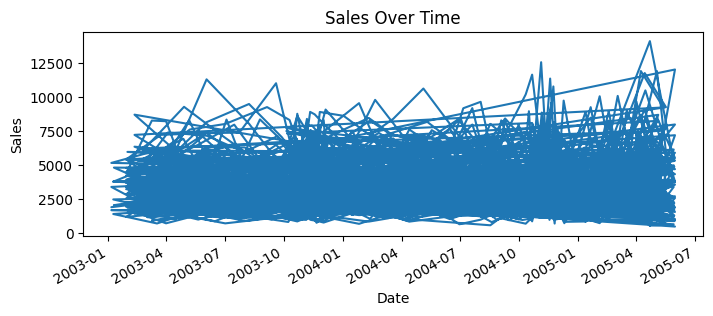

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Plot sales over time
plt.figure(figsize=(8, 3))
df.set_index('ORDERDATE')['SALES'].plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


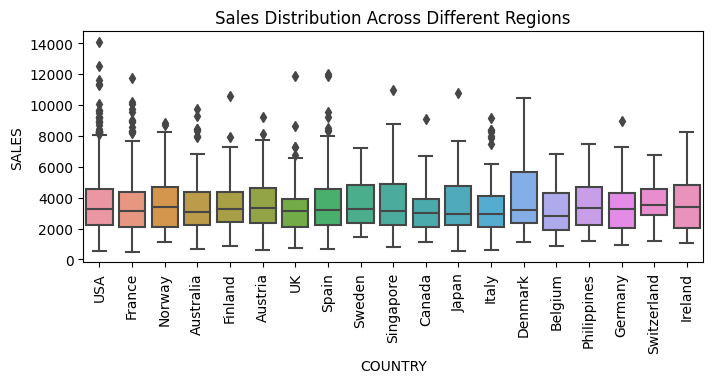

In [126]:
# Plot the sales distribution across regions
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='COUNTRY', y='SALES')
plt.xticks(rotation=90)
plt.title('Sales Distribution Across Different Regions')
plt.show()


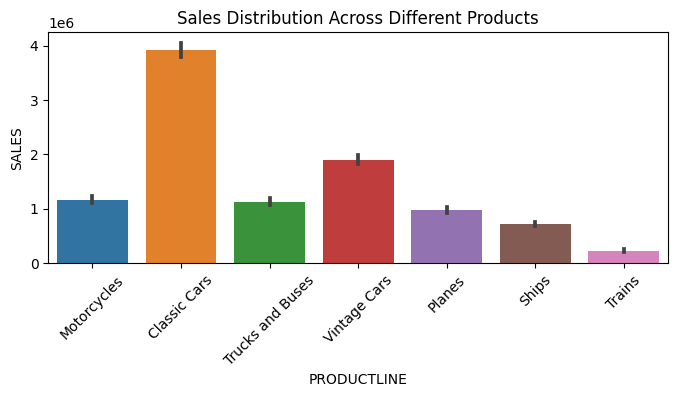

In [127]:
# Bar plot for sales distribution across products
plt.figure(figsize=(8, 3))
sns.barplot(data=df, x='PRODUCTLINE', y='SALES', estimator=sum)
plt.xticks(rotation=45)
plt.title('Sales Distribution Across Different Products')
plt.show()


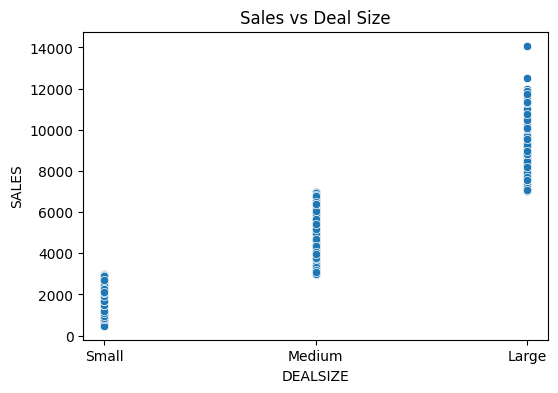

In [128]:
# Scatter plot for sales vs dealsize
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='DEALSIZE', y='SALES')
plt.title('Sales vs Deal Size')
plt.show()


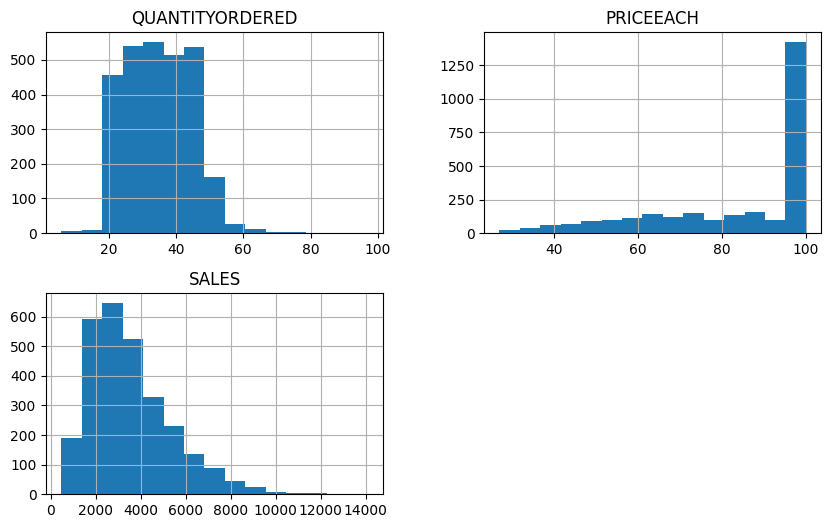

In [129]:
# Numerical data analysis
df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].hist(bins=15, figsize=(10, 6))
plt.show()



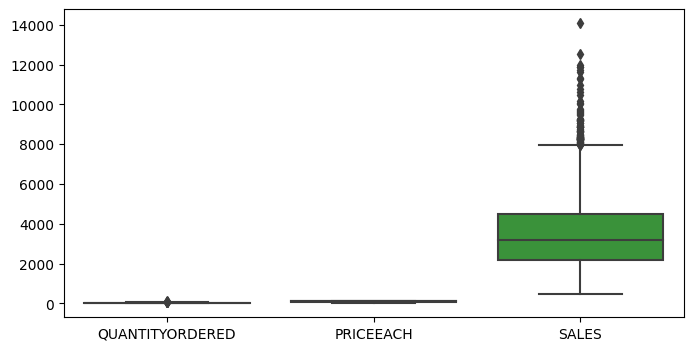

In [130]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']])
plt.show()

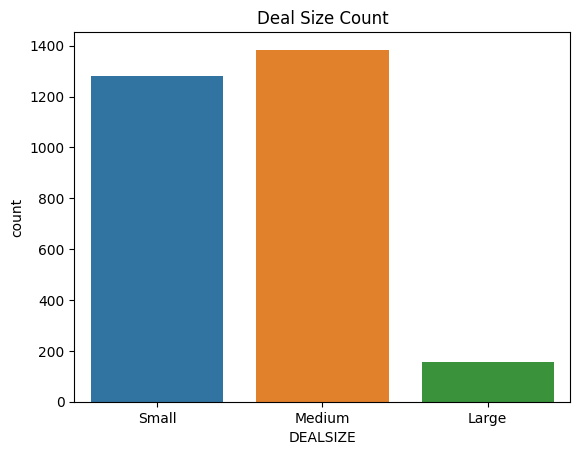

In [131]:
sns.countplot(data=df, x='DEALSIZE')
plt.title('Deal Size Count')
plt.show()

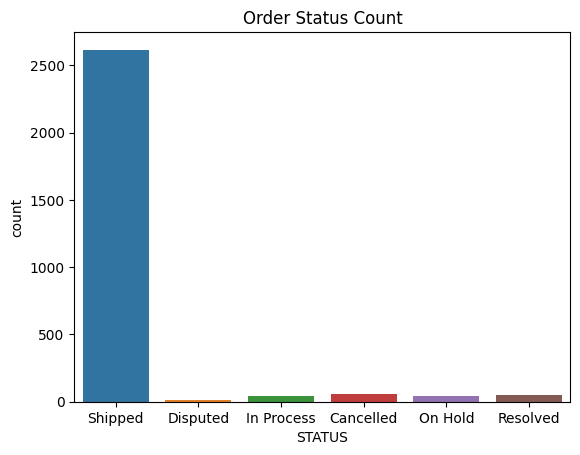

In [132]:
# Categorical data analysis

sns.countplot(data=df, x='STATUS')
plt.title('Order Status Count')
plt.show()

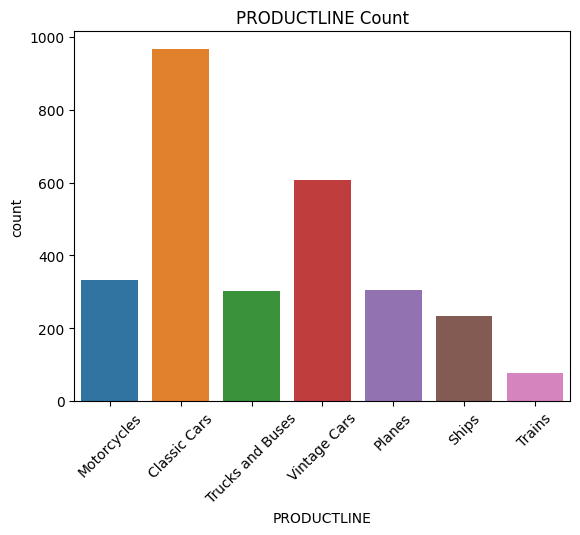

In [133]:
sns.countplot(data=df, x='PRODUCTLINE')
plt.title('PRODUCTLINE Count')
plt.xticks(rotation=45)
plt.show()

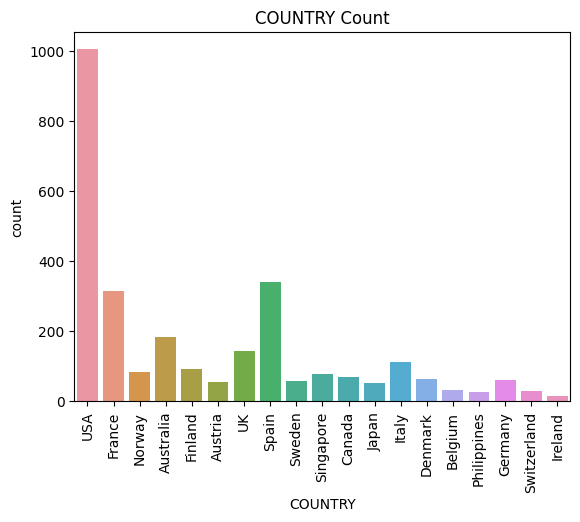

In [134]:
sns.countplot(data=df, x='COUNTRY')
plt.title('COUNTRY Count')
plt.xticks(rotation=90)
plt.show()

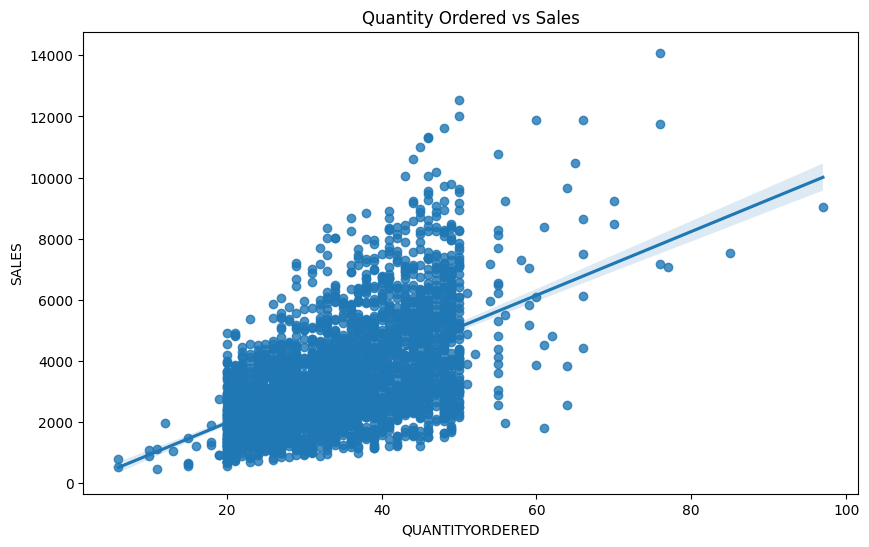

In [135]:
# Scatter plot with regression line for QUANTITYORDERED vs SALES
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='QUANTITYORDERED', y='SALES')
plt.title('Quantity Ordered vs Sales')
plt.show()

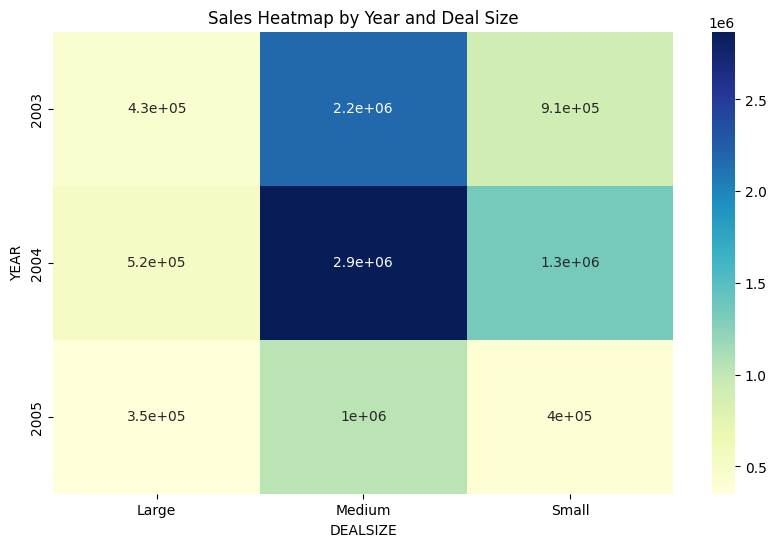

In [136]:
# Heatmap of a pivot table
pivot_table = df.pivot_table(values='SALES', index='YEAR', columns='DEALSIZE', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Sales Heatmap by Year and Deal Size')
plt.show()

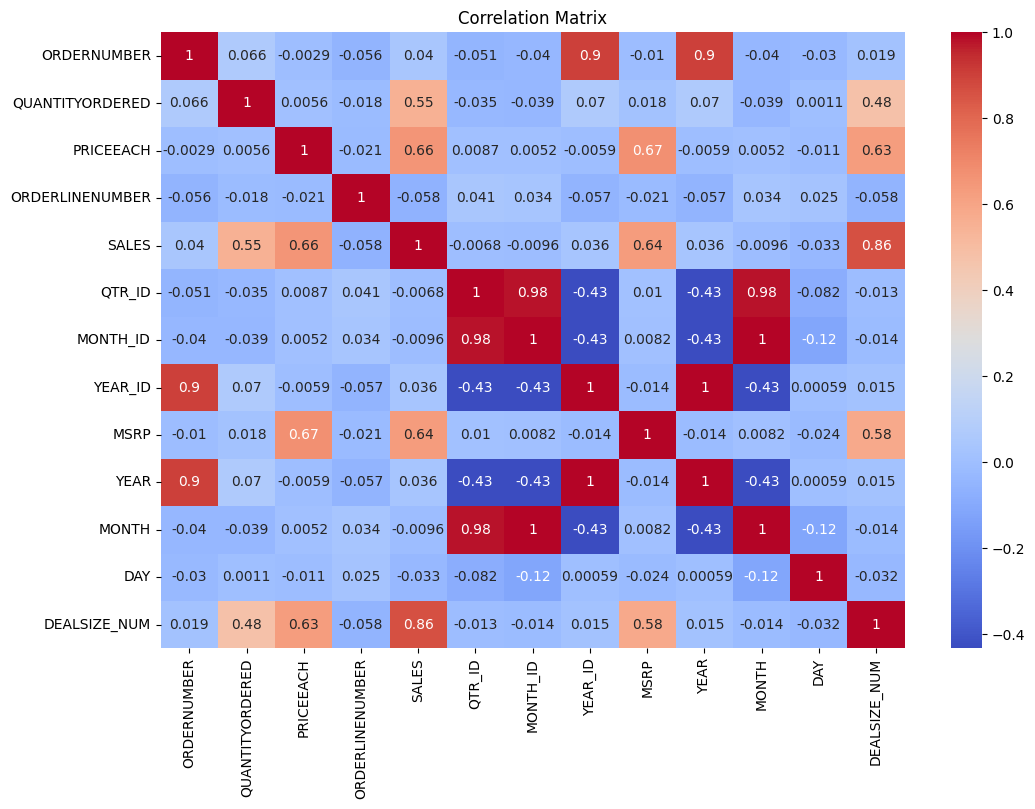

In [166]:
# Check for columns with numeric data
numeric_columns = df.select_dtypes(include=['number']).columns

# Subset the DataFrame to include only numeric columns
numeric_df = df[numeric_columns]

# Compute correlation matrix
corr = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [138]:
#1. Grouping and Aggregating Sales Data
# Group by PRODUCTLINE and sum sales
sales_by_product = df.groupby('PRODUCTLINE').agg({'SALES': 'sum'}).reset_index()
print(sales_by_product)

# Group by COUNTRY and sum sales
sales_by_country = df.groupby('COUNTRY').agg({'SALES': 'sum'}).reset_index()
print(sales_by_country)

# Group by YEAR and sum sales
sales_by_year = df.groupby(df['ORDERDATE'].dt.year).agg({'SALES': 'sum'}).reset_index()
print(sales_by_year)


        PRODUCTLINE       SALES
0      Classic Cars  3919615.66
1       Motorcycles  1166388.34
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47
5  Trucks and Buses  1127789.84
6      Vintage Cars  1903150.84
        COUNTRY       SALES
0     Australia   630623.10
1       Austria   202062.53
2       Belgium   108412.62
3        Canada   224078.56
4       Denmark   245637.15
5       Finland   329581.91
6        France  1110916.52
7       Germany   220472.09
8       Ireland    57756.43
9         Italy   374674.31
10        Japan   188167.81
11       Norway   307463.70
12  Philippines    94015.73
13    Singapore   288488.41
14        Spain  1215686.92
15       Sweden   210014.21
16  Switzerland   117713.56
17           UK   478880.46
18          USA  3627982.83
   ORDERDATE       SALES
0       2003  3516979.54
1       2004  4724162.60
2       2005  1791486.71


In [139]:
# Calculate the percentage of sales by region
sales_by_country['SALES_PERCENT'] = (sales_by_country['SALES'] / sales_by_country['SALES'].sum()) * 100
print(sales_by_country[['COUNTRY', 'SALES_PERCENT']])


        COUNTRY  SALES_PERCENT
0     Australia       6.285721
1       Austria       2.014054
2       Belgium       1.080600
3        Canada       2.233498
4       Denmark       2.448383
5       Finland       3.285100
6        France      11.073035
7       Germany       2.197551
8       Ireland       0.575686
9         Italy       3.734558
10        Japan       1.875558
11       Norway       3.064637
12  Philippines       0.937100
13    Singapore       2.875502
14        Spain      12.117332
15       Sweden       2.093312
16  Switzerland       1.173307
17           UK       4.773230
18          USA      36.161836


In [140]:
# Analyze sales performance of products
sales_by_product = df.groupby('PRODUCTLINE').agg({'SALES': 'sum'}).reset_index()
print(sales_by_product)


        PRODUCTLINE       SALES
0      Classic Cars  3919615.66
1       Motorcycles  1166388.34
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47
5  Trucks and Buses  1127789.84
6      Vintage Cars  1903150.84


In [141]:
## Correlation Between Sales and Deal Size
##Convert DEALSIZE to numerical for correlation.
# Convert DEALSIZE to numerical
df['DEALSIZE_NUM'] = df['DEALSIZE'].map({'Small': 1, 'Medium': 2, 'Large': 3})

# Calculate correlation
correlation = df[['SALES', 'DEALSIZE_NUM']].corr()
print(correlation)


                 SALES  DEALSIZE_NUM
SALES         1.000000      0.862814
DEALSIZE_NUM  0.862814      1.000000


In [142]:
#5. Top-Performing Products Year on Year
# Extract year from ORDERDATE
df['YEAR'] = df['ORDERDATE'].dt.year

# Top 3 products by sales each year
top_products_by_year = df.groupby(['YEAR', 'PRODUCTLINE']).agg({'SALES': 'sum'}).reset_index()
top_products = top_products_by_year.sort_values(by='SALES', ascending=False).groupby('YEAR').head(3)
print(top_products)


    YEAR       PRODUCTLINE       SALES
7   2004      Classic Cars  1762257.09
0   2003      Classic Cars  1484785.29
13  2004      Vintage Cars   911423.77
14  2005      Classic Cars   672573.28
6   2003      Vintage Cars   650987.76
8   2004       Motorcycles   560545.23
5   2003  Trucks and Buses   420429.93
20  2005      Vintage Cars   340739.31
15  2005       Motorcycles   234947.53


Available columns: Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'YEAR', 'MONTH', 'DAY', 'DEALSIZE_NUM'],
      dtype='object')
   YEAR       PRODUCTLINE  SALES_PERCENT
0  2003      Classic Cars      42.217627
1  2003      Vintage Cars      18.509853
2  2003  Trucks and Buses      11.954290
3  2004      Classic Cars      37.303057
4  2004      Vintage Cars      19.292811
5  2004       Motorcycles      11.865494
6  2005      Classic Cars      37.542745
7  2005      Vintage Cars      19.019918
8  2005       Motorcycles      13.114668


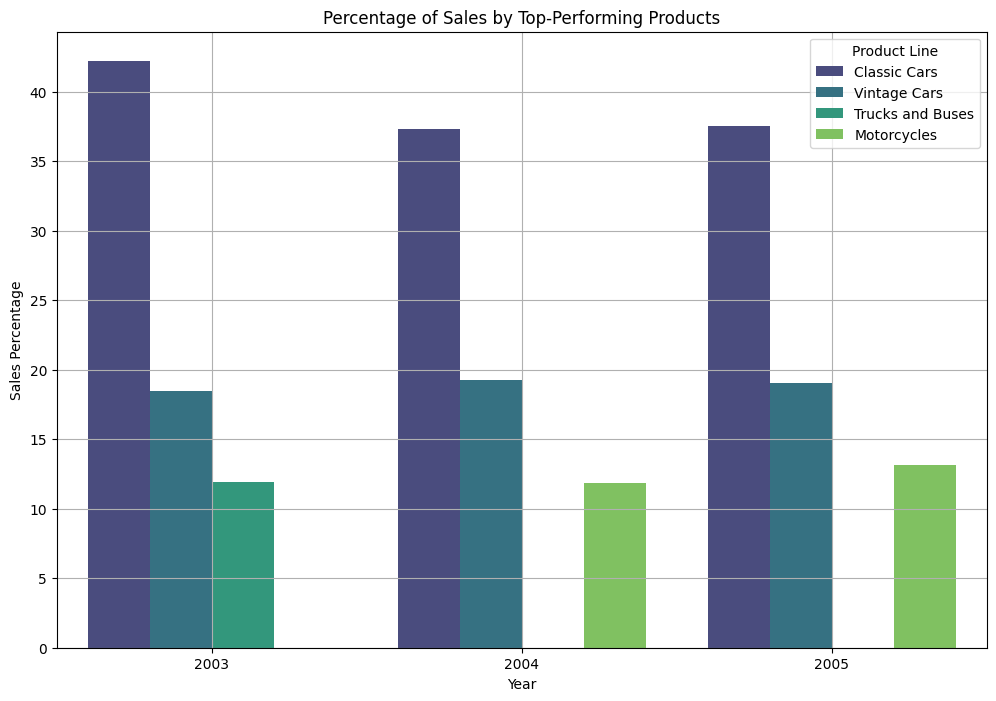

In [143]:

# Verify column names
print("Available columns:", df.columns)

# Handle missing columns by checking for PRODUCTLINE
if 'PRODUCTLINE' not in df.columns:
    raise ValueError("The column 'PRODUCTLINE' is missing in the dataset. Please check the data and provide the correct column name.")

# Extract year from ORDERDATE
df['YEAR'] = df['ORDERDATE'].dt.year

# Identify top-performing products by total sales per year
top_products = df.groupby(['YEAR', 'PRODUCTLINE'])['SALES'].sum().reset_index()
top_products = top_products.sort_values(by=['YEAR', 'SALES'], ascending=[True, False])

# Select the top 3 products per year
top_products['Rank'] = top_products.groupby('YEAR')['SALES'].rank(method='first', ascending=False)
top_products = top_products[top_products['Rank'] <= 3]

# Total sales per year
total_sales_by_year = df.groupby('YEAR')['SALES'].sum().reset_index()

# Merge total sales with top products
top_products_sales = top_products.merge(total_sales_by_year, on='YEAR', suffixes=('_TOP', '_TOTAL'))

# Calculate percentage contribution
top_products_sales['SALES_PERCENT'] = (top_products_sales['SALES_TOP'] / top_products_sales['SALES_TOTAL']) * 100

print(top_products_sales[['YEAR', 'PRODUCTLINE', 'SALES_PERCENT']])

# Plot the percentage contribution of top-performing products
plt.figure(figsize=(12, 8))
sns.barplot(data=top_products_sales, x='YEAR', y='SALES_PERCENT', hue='PRODUCTLINE', palette='viridis')
plt.title('Percentage of Sales by Top-Performing Products')
plt.xlabel('Year')
plt.ylabel('Sales Percentage')
plt.legend(title='Product Line')
plt.show()



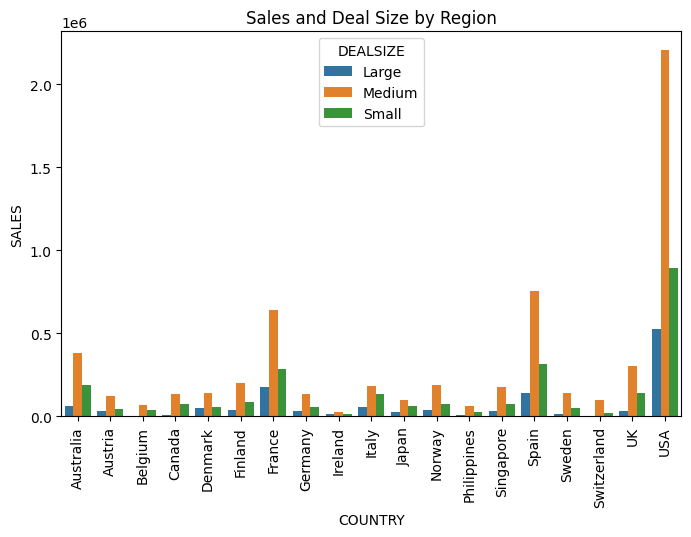

In [144]:
##7. Performance of Different Regions
# Sales and deal size analysis by region
sales_by_country_dealsize = df.groupby(['COUNTRY', 'DEALSIZE']).agg({'SALES': 'sum'}).reset_index()

# Bar plot for sales and deal size by region
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_country_dealsize, x='COUNTRY', y='SALES', hue='DEALSIZE')
plt.xticks(rotation=90)
plt.title('Sales and Deal Size by Region')
plt.show()


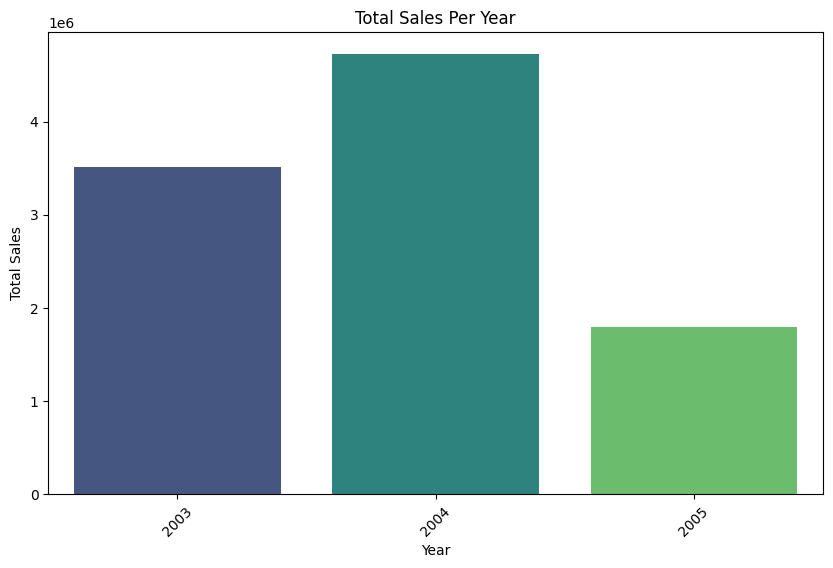

In [153]:

# Extract year and month from ORDERDATE
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month

# Group by YEAR and sum sales
yearly_sales = df.groupby('YEAR')['SALES'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sales, x='YEAR', y='SALES', palette='viridis')
plt.title('Total Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
#plt.grid(axis='y')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


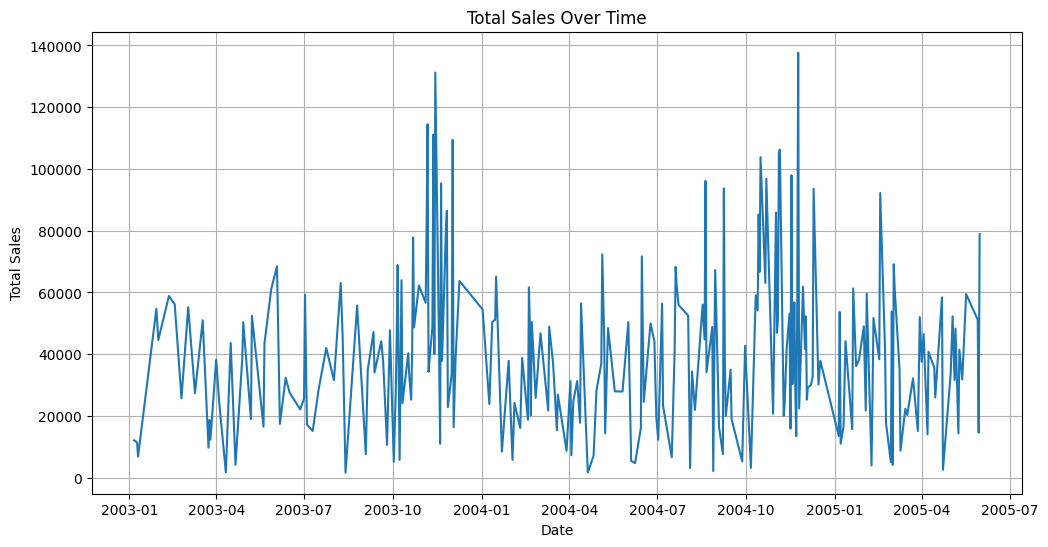

In [154]:
# Group by ORDERDATE (day) and sum sales
daily_sales = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ORDERDATE', y='SALES')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


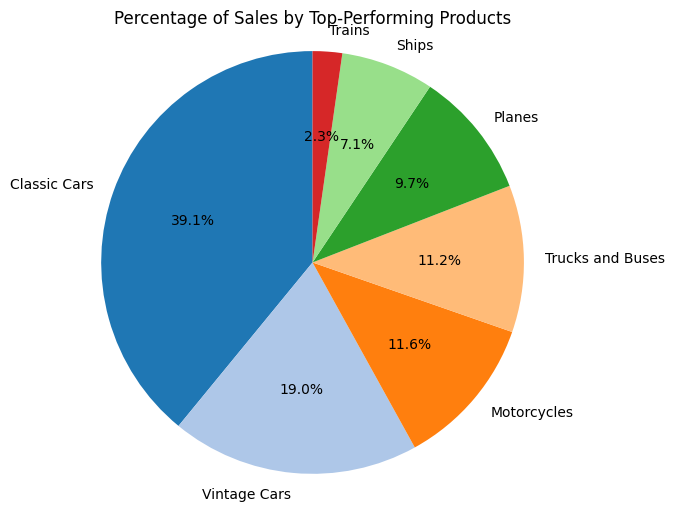

In [162]:
# Extract year
df['YEAR'] = df['ORDERDATE'].dt.year

# Aggregate sales by product line
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
top_products = top_products.sort_values(by='SALES', ascending=False)

# Calculate total sales and percentages
total_sales = df['SALES'].sum()
top_products['SALES_PERCENT'] = (top_products['SALES'] / total_sales) * 100

# Generate a list of colors
num_colors = len(top_products)
colors = plt.cm.tab20.colors[:num_colors]  # Using 'tab20' colormap for up to 20 distinct colors

# Plot pie chart with distinct colors for each product
plt.figure(figsize=(6, 6))
plt.pie(top_products['SALES_PERCENT'], labels=top_products['PRODUCTLINE'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Sales by Top-Performing Products')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

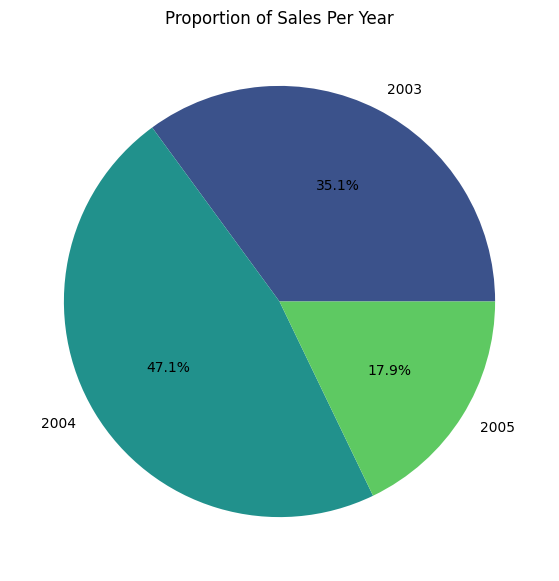

In [165]:
# Extract year from ORDERDATE
df['YEAR'] = df['ORDERDATE'].dt.year

# Summarize data
yearly_sales = df.groupby('YEAR')['SALES'].sum().reset_index()
# Generate a list of colors
num_colors = len(top_products)
colors = plt.cm.tab20.colors[:num_colors]
# Plot the Pie Chart
plt.figure(figsize=(10, 7))
plt.pie(yearly_sales['SALES'], labels=yearly_sales['YEAR'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(yearly_sales)))
plt.title('Proportion of Sales Per Year')
plt.show()

In [168]:
data = pd.DataFrame(df)

# Creating a pivot table to summarize total sales and total quantity ordered by product line and year
pivot_table = pd.pivot_table(data, 
                             values=['SALES', 'QUANTITYORDERED'], 
                             index='PRODUCTLINE', 
                             columns='YEAR', 
                             aggfunc='sum',
                             margins=True,
                             margins_name='Total')

print("Pivot Table:")
print(pivot_table)

Pivot Table:
                 QUANTITYORDERED                                SALES  \
YEAR                        2003     2004     2005  Total        2003   
PRODUCTLINE                                                             
Classic Cars             12473.0  15418.0   6101.0  33992  1484785.29   
Motorcycles               3739.0   5690.0   2234.0  11663   370895.58   
Planes                    2996.0   5524.0   2207.0  10727   272257.60   
Ships                     2844.0   3937.0   1346.0   8127   244821.09   
Trains                    1000.0   1303.0    409.0   2712    72802.29   
Trucks and Buses          4056.0   5002.0   1719.0  10777   420429.93   
Vintage Cars              7504.0   9950.0   3615.0  21069   650987.76   
Total                    34612.0  46824.0  17631.0  99067  3516979.54   

                                                       
YEAR                    2004        2005        Total  
PRODUCTLINE                                            
Classic Cars   

/tmp/ipykernel_33/2225883017.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ORDERDATE': pd.date_range(start='2020-01-01', periods=100, freq='M'),
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


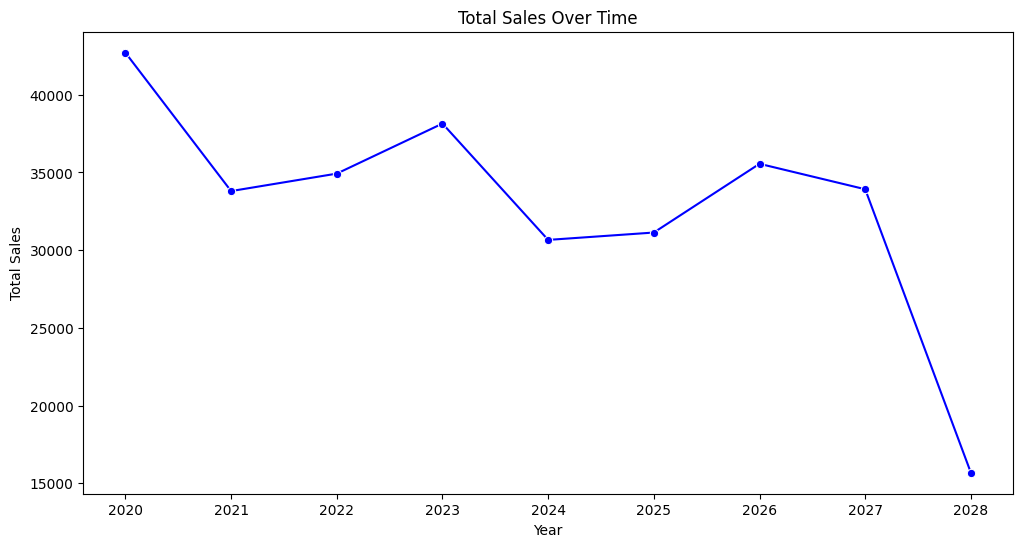

In [170]:
##1. What is the overall trend of sales over time?



data = {
    'ORDERDATE': pd.date_range(start='2020-01-01', periods=100, freq='M'),
    'SALES': np.random.randint(1000, 5000, 100)
}

df = pd.DataFrame(data)

# Extract year and month from ORDERDATE
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month

# Total Sales Per Year - Line Plot
yearly_sales = df.groupby('YEAR')['SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='YEAR', y='SALES', marker='o', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
#plt.grid(True)
plt.show()